# Importing all required libraries and loading my dataset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('online_shoppers_intention.csv')

In [3]:
dataset.shape

(12330, 18)

In [4]:
dataset.head

<bound method NDFrame.head of        Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0            

In [5]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
dataset['Revenue'] = dataset['Revenue'].astype(int)

In [9]:
dataset['Weekend'] = dataset['Weekend'].astype(int)

In [10]:
dataset['VisitorType']=dataset['VisitorType'].replace(['Returning_Visitor','New_Visitor','Other'],[1,0,2])

In [11]:
dataset["Revenue"].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [12]:
dataset["VisitorType"].value_counts()

1    10551
0     1694
2       85
Name: VisitorType, dtype: int64

C:\Users\BUSINESS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OperatingSystems', ylabel='count'>

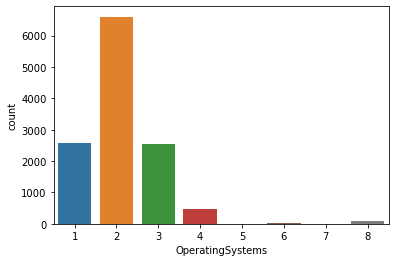

In [13]:
sns.countplot(dataset["OperatingSystems"])

C:\Users\BUSINESS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Revenue', ylabel='count'>

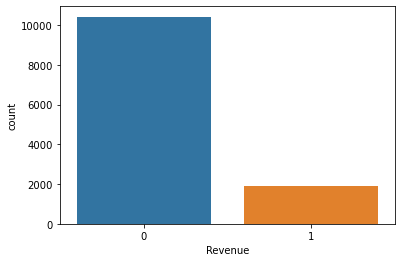

In [14]:
sns.countplot(dataset["Revenue"])

In [15]:
dataset.drop("Month",axis=1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,1,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,1,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,1,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,1,0,0


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [17]:
# Using train_test from Scikit Learn to divide the data into a training dataset and test dataset
#Normalising the data to train a neural network, Using standardscaler estimator from Scikit Learn : Thereby making varaible 0 and SD 1
x = dataset.drop(columns=["Month","Revenue","SpecialDay","Region","TrafficType","Weekend"])
y = dataset["Revenue"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=99)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
# Part two: Building and training my neural network
# Using Keras sequential model allows me to build my neural network layer by layer
# using "Dense" layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8,activation="relu",input_shape=(12,)))
model.add(tf.keras.layers.Dense(2,activation="softmax"))

In [19]:
# Compile model 
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [21]:
class_weights = {0:1,1:6}
history = model.fit(x_train, y_train,\
                    batch_size=8, epochs=50, \
                    verbose=2,class_weight=class_weights,\
                    validation_split=0.2)

Epoch 1/50
987/987 - 6s - loss: 0.9475 - accuracy: 0.7095 - val_loss: 0.4769 - val_accuracy: 0.8054 - 6s/epoch - 6ms/step
Epoch 2/50
987/987 - 4s - loss: 0.7827 - accuracy: 0.8313 - val_loss: 0.4401 - val_accuracy: 0.8338 - 4s/epoch - 4ms/step
Epoch 3/50
987/987 - 3s - loss: 0.7557 - accuracy: 0.8468 - val_loss: 0.4114 - val_accuracy: 0.8555 - 3s/epoch - 3ms/step
Epoch 4/50
987/987 - 3s - loss: 0.7400 - accuracy: 0.8533 - val_loss: 0.4096 - val_accuracy: 0.8561 - 3s/epoch - 3ms/step
Epoch 5/50
987/987 - 3s - loss: 0.7288 - accuracy: 0.8548 - val_loss: 0.3994 - val_accuracy: 0.8642 - 3s/epoch - 3ms/step
Epoch 6/50
987/987 - 3s - loss: 0.7188 - accuracy: 0.8593 - val_loss: 0.4158 - val_accuracy: 0.8505 - 3s/epoch - 3ms/step
Epoch 7/50
987/987 - 3s - loss: 0.7113 - accuracy: 0.8567 - val_loss: 0.3916 - val_accuracy: 0.8566 - 3s/epoch - 3ms/step
Epoch 8/50
987/987 - 3s - loss: 0.7063 - accuracy: 0.8572 - val_loss: 0.4004 - val_accuracy: 0.8561 - 3s/epoch - 3ms/step
Epoch 9/50
987/987 - 3s 

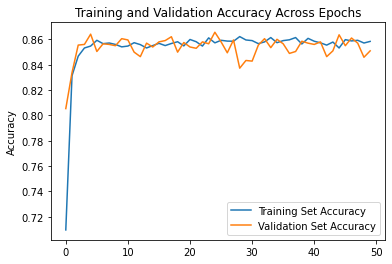

In [22]:
# Part three: Evaluating Network
accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]

plt.plot(accuracy, label="Training Set Accuracy")
plt.plot(validation_accuracy,label="Validation Set Accuracy")
plt.ylabel("Accuracy")
#plt.ylim([min(plt.ylim()),0.7])
plt.title("Training and Validation Accuracy Across Epochs")
plt.legend()

In [23]:
validation_accuracy

[0.8053725361824036,
 0.8337557315826416,
 0.8555499315261841,
 0.8560567498207092,
 0.864166259765625,
 0.8504815101623535,
 0.8565636277198792,
 0.8560567498207092,
 0.8550430536270142,
 0.8606183528900146,
 0.8596046566963196,
 0.8499746322631836,
 0.846426784992218,
 0.8570704460144043,
 0.8540294170379639,
 0.8580841422080994,
 0.8590978384017944,
 0.8621388673782349,
 0.8499746322631836,
 0.8575772643089294,
 0.8540294170379639,
 0.8530157208442688,
 0.8580841422080994,
 0.8565636277198792,
 0.8656867742538452,
 0.8580841422080994,
 0.8494678139686584,
 0.8596046566963196,
 0.8373035788536072,
 0.8433856964111328,
 0.8428788781166077,
 0.8555499315261841,
 0.8606183528900146,
 0.853522539138794,
 0.8601115345954895,
 0.8565636277198792,
 0.8489609956741333,
 0.8504815101623535,
 0.8585909605026245,
 0.8570704460144043,
 0.8560567498207092,
 0.8580841422080994,
 0.846426784992218,
 0.8509883284568787,
 0.8636593818664551,
 0.8550430536270142,
 0.8611251711845398,
 0.85707044601440

In [24]:
y_train

3393     1
10700    1
4524     0
5641     0
2003     0
        ..
8149     0
4976     0
11729    0
8684     0
9529     0
Name: Revenue, Length: 9864, dtype: int32

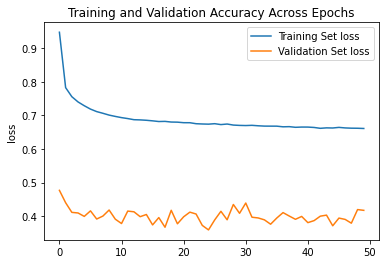

In [25]:
#For Loss 
loss = history.history["loss"]
validation_loss = history.history["val_loss"]

plt.plot(loss, label="Training Set loss")
plt.plot(validation_loss,label="Validation Set loss")
plt.ylabel("loss")
#plt.ylim([min(plt.ylim()),0.7])
plt.title("Training and Validation Accuracy Across Epochs")
plt.legend()

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)

78/78 [==============================] - 0s 1ms/step


In [28]:
y_test

6173     0
7120     0
6646     1
5733     0
7679     1
        ..
5651     1
10236    0
7169     0
4667     0
12251    0
Name: Revenue, Length: 2466, dtype: int32

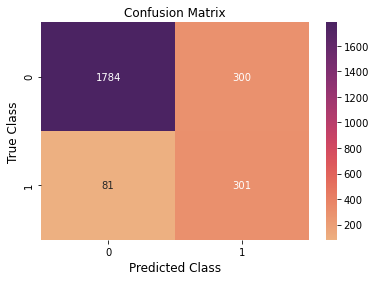

In [29]:
confusion_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusion_matrix,cmap='flare',annot=True,fmt='d')
plt.xlabel('Predicted Class',fontsize=12)
plt.ylabel('True Class',fontsize=12)
plt.title('Confusion Matrix',fontsize=12)
plt.show()

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.90      2084
           1       0.50      0.79      0.61       382

    accuracy                           0.85      2466
   macro avg       0.73      0.82      0.76      2466
weighted avg       0.89      0.85      0.86      2466

